In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)

# 1) Some preprocessing and data exploration

In [4]:
data = pd.read_csv('student-mat.csv')

In [23]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G_avg
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,3,3,6,5,6,6,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,3,3,4,5,5,6,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,7,3,10,7,8,10,8.333333
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,3,5,2,15,14,15,14.666667
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,4,5,4,6,10,10,8.666667


In [48]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G_avg
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,5.253165,3.554430,5.708861,10.908861,10.713924,10.415190,10.679325
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,2.793522,1.390303,8.003096,3.319195,3.761505,4.581443,3.696786
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000,3.000000,0.000000,0.000000,1.333333
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,3.000000,3.000000,0.000000,8.000000,9.000000,8.000000,8.333333
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,4.000000,4.000000,4.000000,11.000000,11.000000,11.000000,10.666667
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,7.000000,5.000000,8.000000,13.000000,13.000000,14.000000,13.333333
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,15.000000,5.000000,75.000000,19.000000,19.000000,20.000000,19.333333


In [7]:
# all features
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [15]:
# merging weekends and weekdays consumption
data['Walc'] = data['Walc'] + data['Dalc']

Text(0.5,0,'Weekly alcohol consumption')

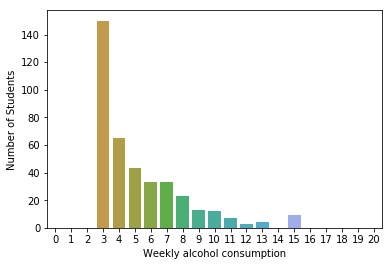

In [57]:
# There is no student who does not consume alcohol. However, all students at least 2 times in a week consume alcohol.
list = []
for i in range(21):
    list.append(len(data[data.Walc == i]))
ax = sns.barplot(x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], y = list)
plt.ylabel('Number of Students')
plt.xlabel('Weekly alcohol consumption')

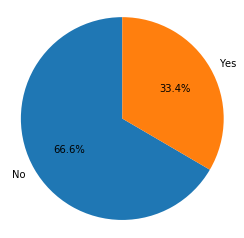

In [54]:
# romantic satus
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(data['romantic'].value_counts().tolist(), 
        labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

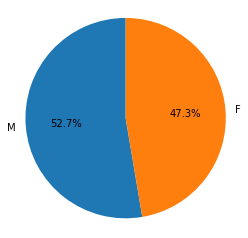

In [55]:
# gender balance
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(data['sex'].value_counts().tolist(), 
        labels=['M', 'F'], autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

In [59]:
# alcohol consumption
female = data.loc[data['sex'] == 'F']
male = data.loc[data['sex'] == 'M']

In [60]:
male.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G_avg
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,16.657754,2.839572,2.561497,1.491979,1.764706,0.368984,4.000000,3.486631,3.197861,1.732620,6.128342,3.764706,5.144385,11.229947,11.074866,10.914439,11.073084
std,1.356181,1.100311,1.087670,0.750405,0.808713,0.788152,0.898027,1.001924,1.135164,1.079205,3.286433,1.343337,5.980749,3.392839,3.868088,4.495297,3.757272
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000,3.000000,0.000000,0.000000,1.666667
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,3.000000,3.000000,0.000000,9.000000,9.000000,9.000000,9.000000
50%,16.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,5.000000,4.000000,4.000000,11.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.500000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,8.000000,5.000000,8.000000,14.000000,14.000000,14.000000,13.666667
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,15.000000,5.000000,38.000000,19.000000,19.000000,20.000000,19.333333


In [61]:
female.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G_avg
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,16.730769,2.668269,2.485577,1.408654,2.278846,0.302885,3.894231,3.009615,3.028846,1.254808,4.466346,3.365385,6.216346,10.620192,10.389423,9.966346,10.325321
std,1.201696,1.085946,1.090044,0.645551,0.791949,0.701683,0.894625,0.942760,1.089757,0.595860,1.958216,1.407761,9.445819,3.232530,3.641851,4.622338,3.614018
min,15.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000,4.000000,0.000000,0.000000,1.333333
25%,16.000000,2.000000,2.000000,1.000000,2.000000,0.000000,3.750000,2.000000,2.000000,1.000000,3.000000,2.000000,0.000000,8.000000,8.000000,8.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,4.000000,3.000000,4.000000,10.000000,10.000000,10.000000,10.000000
75%,18.000000,4.000000,3.000000,2.000000,3.000000,0.000000,4.000000,4.000000,4.000000,1.000000,5.000000,5.000000,8.000000,13.000000,13.000000,13.000000,13.000000
max,20.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,15.000000,5.000000,75.000000,19.000000,18.000000,19.000000,18.666667


# 2) Clustering

In [20]:
# G_avg = average student grade
data['G_avg'] = (data['G1'] + data['G2'] + data['G3']) / 3

In [24]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G_avg
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,3,3,6,5,6,6,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,3,3,4,5,5,6,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,7,3,10,7,8,10,8.333333
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,3,5,2,15,14,15,14.666667
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,4,5,4,6,10,10,8.666667


In [33]:
X = data[['Walc','G_avg']]

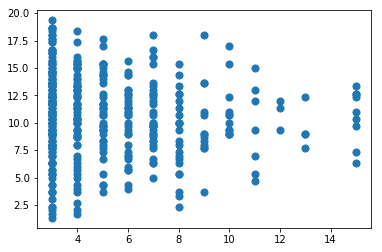

In [42]:
from sklearn.datasets.samples_generator import make_blobs
plt.scatter(X['Walc'], X['G_avg'], s=50);

In [49]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

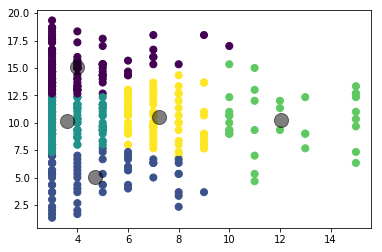

In [50]:
plt.scatter(X['Walc'], X['G_avg'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

K means clustering gave poor results. The connection between average grade and alcohol consumption is not linear. But it is clear, that students, who drink a lot, don't get very high or very low grades.

# 3) Trying to predict grade using regression models

In [62]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.linear_model import Ridge

from sklearn.model_selection import cross_val_score

In [63]:
y1 = data['G_avg']
X1 = data.drop(['G1', 'G2', 'G3', 'G_avg'], axis=1)

In [64]:
X1 = pd.get_dummies(X1)

In [65]:
names = ['DecisionTreeRegressor', 'LinearRegression', 'Ridge', 'Lasso']

clf_list = [DecisionTreeRegressor(),
            LinearRegression(),
            Ridge(),
            Lasso()]

In [67]:
for name, clf in zip(names, clf_list):
    print(name, end=': ')
    print(cross_val_score(clf, X1, y1, cv=5).mean())

DecisionTreeRegressor: -0.7343112009162731
LinearRegression: 0.03705415908636271
Ridge: 0.04368383068183843
Lasso: -0.027525271766370984


/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Bad result for regression models:(